<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#005097; border:0' role="tab" aria-controls="home"><center>Inferência Estatística (GCC1625) - Trabalho 4</center></h1>

- Nome completo: <Vinicius Gonçalves Paraizo Borges>
- [Link para vídeo](<https://youtu.be/GjhXjibgIuA>)

# (1) GLMs - Regressão Logística
A regressão logística é uma ferramenta fundamental na modelagem de variáveis
categóricas binárias. Neste item avaliativo, você aplicará esse modelo para identificar
fatores associados à sobrevivência de passageiros no naufrágio do Titanic.

Dados
Utilize o seguinte conjunto de dados:
- Dataset: Titanic Dataset
- Descrição: Informações sobre passageiros do Titanic, incluindo idade,
sexo, classe, número de familiares a bordo, entre outros. A variável resposta
‘Survived‘ indica se o passageiro sobreviveu (1) ou não (0).

Tarefas
1. Ajustar um modelo de regressão logística para prever Survived, utilizando
pelo menos três variáveis explicativas: Sex, Pclass, Age, SibSp, ou outras
de sua escolha.
2. Interpretar os coeficientes estimados, com especial atenção para o significado
de sinais positivos e negativos em termos da chance de sobrevivência.
3. Avaliar a significância estatística dos coeficientes e discutir quais variáveis
possuem maior impacto na predição.
4. Calcular a probabilidade estimada de sobrevivência para um passageiro do
sexo feminino, 25 anos, na 1ª classe, viajando sozinho.
5. Avaliar o desempenho do modelo com métricas como acurácia, precisão,
recall e matriz de confusão.
6. Verificar graficamente se há padrões nos resíduos de Pearson que indiquem
problemas de ajuste.

In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import statsmodels.api as sm

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
survived = pd.read_csv('gender_submission.csv')

test['Survived'] = survived['Survived']

In [ ]:
print(train.columns)
print(test.columns) # não tem a variável-alvo, pois esta está armazenada em 'survived'

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**Definições das variáveis**

| Variável    | Nome/Descrição                                      | Tipo/Códigos                                      |
|-------------|-----------------------------------------------------|---------------------------------------------------|
| Survived    | Sobreviveu                                          | 0 = Não, 1 = Sim                                  |
| Pclass      | Classe do bilhete                                   | 1 = 1ª, 2 = 2ª, 3 = 3ª                            |
| Sex         | Sexo                                                | male, female                                      |
| Age         | Idade em anos                                       | Numérico                                          |
| SibSp       | Nº de irmãos/cônjuges a bordo                       | Numérico                                          |
| Parch       | Nº de pais/filhos a bordo                           | Numérico                                          |
| Ticket      | Número do bilhete                                   | Texto                                             |
| Fare        | Tarifa paga                                         | Numérico                                          |
| Cabin       | Número da cabine                                    | Texto                                             |
| Embarked    | Porto de embarque                                   | C = Cherbourg, Q = Queenstown, S = Southampton    |


## Exploração dos dados

In [16]:
train.shape

(891, 12)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

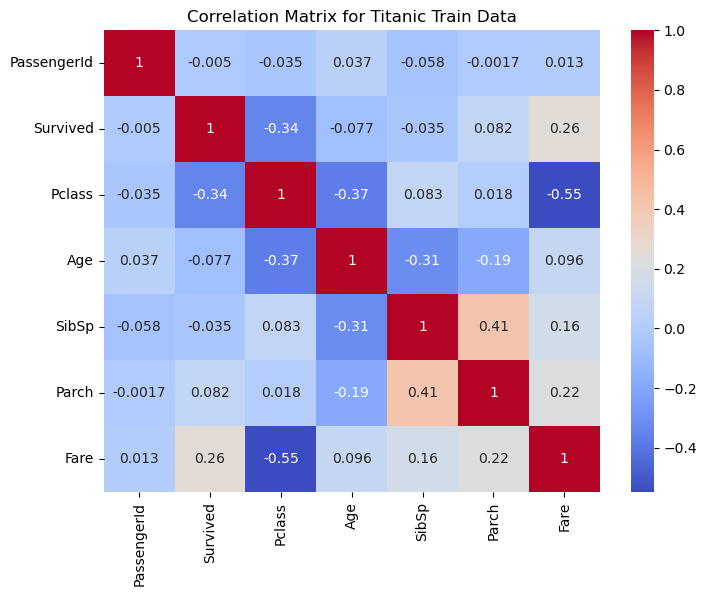

In [19]:
corr_matrix = train.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Titanic Train Data')
plt.show()

## Treinando o modelo de LogisticRegression

In [4]:
# remover os NaN de 'Age'
train.dropna(subset=['Age'], inplace=True)
test.dropna(subset=['Age'], inplace=True) 

# Codificando 'Sex': female = 0, male = 1
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})


# Adicionamos 'Fare', visto a sua correlação com 'Survived'
X_train = train[['Sex', 'Pclass', 'Age', 'SibSp', "Parch"]] 
y_train = train['Survived']

X_test = test[['Sex', 'Pclass', 'Age', 'SibSp', "Parch"]]
y_test = test['Survived']


# Inclui o intercepto (constante)
X_train_sm = sm.add_constant(X_train)

# Ajusta o modelo de regressão logística
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Exibe o resumo estatístico
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.445814
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Tue, 01 Jul 2025   Pseudo R-squ.:                  0.3400
Time:                        17:00:10   Log-Likelihood:                -318.31
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.003e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6197      0.547     10.279      0.000       4.548       6.691
Sex           -2.6374      0.


| Variável | Coeficiente | Explicação |
|----------|-------------|------------|
| const    | 5.6197      | Intercepto do modelo; representa o logit da probabilidade de sobrevivência quando todas as variáveis explicativas são zero. |
| Sex      | -2.6374     | Ser do sexo masculino (1) diminui a chance de sobrevivência em relação ao feminino (0): log-odds de sobrevivência 2.6374 unidades menor do que mulheres, ceteris paribus. |
| Pclass   | -1.3160     | Quanto maior valor de Pclass (classe mais baixa), menor a chance de sobrevivência. |
| Age      | -0.0445     | A cada aumento de 1 ano na idade, a chance de sobrevivência diminui levemente (0.0445). |
| SibSp    | -0.3646     | A cada aumento de 1 irmãos/cônjuges a bordo, a chance de sobrevivência reduz em 0.3646. |
| Parch    | -0.0371     | Ter mais pais/filhos a bordo reduz levemente a chance de sobrevivência. |

---

A tabela abaixo resume os coeficientes estimados e seus respectivos valores-p:

| Variável | Coeficiente | p-valor  | Significância? | Interpretação do Impacto |
|----------|-------------|----------|----------------|-------------------------|
| Sex      | -2.6374     | 0.000    | Sim            | Forte impacto: ser homem reduz significativamente a chance de sobrevivência. |
| Pclass   | -1.3160     | 0.000    | Sim            | Forte impacto: passageiros de classes mais baixas têm menor chance de sobreviver. |
| Age      | -0.0445     | 0.000    | Sim            | Idade maior reduz levemente a chance de sobrevivência. |
| SibSp    | -0.3646     | 0.004    | Sim            | Ter mais irmãos/cônjuges a bordo reduz a chance de sobrevivência. |
| Parch    | -0.0371     | 0.756    | Não            | Sem impacto estatisticamente significativo. |

*Discussão:*
As variáveis `Sex`, `Pclass`, `Age` e `SibSp` possuem p-valores menores que 0.05, indicando que são estatisticamente significativas para a predição da sobrevivência. Entre elas, `Sex` e `Pclass` apresentam os maiores coeficientes em módulo, mostrando maior impacto na chance de sobrevivência. A variável `Parch` não é significativa (p-valor alto), sugerindo pouco ou nenhum efeito na predição do modelo.

---

In [11]:
# Calcular a probabilidade estimada de sobrevivência para um passageiro do
# sexo feminino, 25 anos, na 1ª classe, viajando sozinho.


# ['Sex', 'Pclass', 'Age', 'SibSp', "Parch"]
const = 1.0

x_new = pd.DataFrame([[const, 0, 1, 25, 0, 0]], columns=X_train_sm.columns)
pred = logit_model.predict(x_new)
print(f"Probabilidade estimada de sobrevivência: {pred.iloc[0]:.4f}")


Probabilidade estimada de sobrevivência: 0.9605


In [28]:

# Inclui o intercepto (constante)
X_test_sm = sm.add_constant(X_test)

y_pred_proba = logit_model.predict(X_test_sm)

threshold = 0.5
y_pred = [1 if i > threshold else 0 for i in y_pred_proba]

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       205
           1       0.88      0.91      0.89       127

    accuracy                           0.92       332
   macro avg       0.91      0.91      0.91       332
weighted avg       0.92      0.92      0.92       332



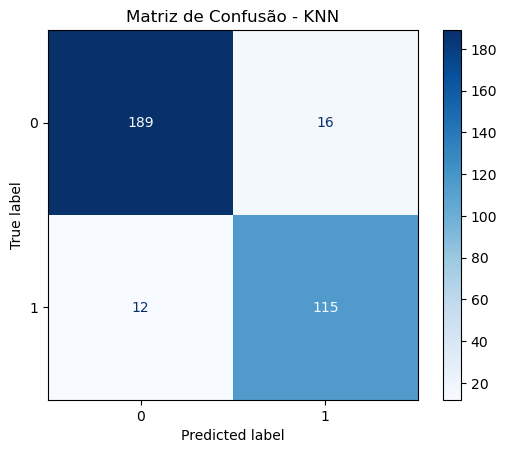

In [15]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - KNN')


# Avaliação
print(classification_report(y_test, y_pred))

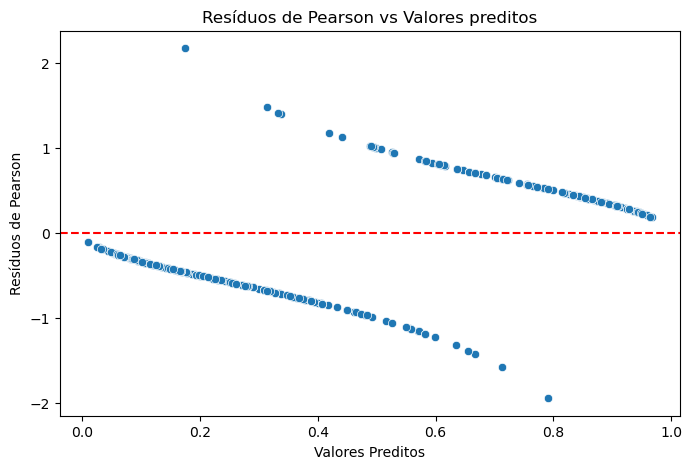

In [31]:
y_pred_proba = np.array(y_pred_proba)

# Resíduos de Pearson
# resid_pearson = logit_model.resid_pearson
resid_pearson = (y_test - (y_pred_proba)) / np.sqrt(y_pred_proba * (1 - y_pred_proba))

# 1. Resíduos vs Valores ajustados
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_proba, y=resid_pearson)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos de Pearson')
plt.title('Resíduos de Pearson vs Valores preditos')
plt.show()

Os resíduos são maiores (em módulo) quando as probabilidades previstas estão próximas de 0.2 ou 0.8. Não indica, por si só, um problema no ajuste, mas exige cautela ao interpretar pontos extremos.

Os resíduos parecem razoavelmente simétricos em torno da linha horizontal vermelha ($r = 0$), o que é desejável.
Isso sugere que o modelo não está sistematicamente superestimando ou subestimando.

Existem pontos influentes ou outliers que se destacam por estarem próximos de -2 ou +2, porém isso é esperado e não compromete o modelo como um todo. 


---

# (2) GLMs - Regressão de Poisson

Modelos Lineares Generalizados (GLMs) oferecem uma estrutura flexível para
modelar variáveis resposta com distribuições da família exponencial. Nesta tarefa,
você irá explorar um caso em que a variável resposta é de contagem, ajustando
modelos alternativos e avaliando a qualidade do ajuste.

Dados
Utilize o seguinte conjunto de dados:
- Dataset: Bike Sharing Dataset (UCI)
- Descrição: Dados sobre o aluguel de bicicletas em Washington D.C., com
variáveis como temperatura, umidade, dia da semana, feriados, entre outros.
A variável de interesse ‘cnt‘ representa o número total de bicicletas
alugadas por dia.

Tarefas
1. Ajustar um modelo de regressão de Poisson para modelar a variável ‘cnt‘
com base em pelo menos três variáveis explicativas de sua escolha.
2. Avaliar a presença de overdispersion comparando a deviance ao número de
graus de liberdade. Em caso afirmativo, ajustar um modelo quasi-Poisson.
3. Interpretar os coeficientes do modelo final, discutindo o sinal e o impacto
das variáveis selecionadas.
4. Construir um gráfico de resíduos de deviance vs. valores previstos e
avaliar se há padrões sistemáticos.
5. Comparar o modelo final com um modelo de regressão linear simples (OLS)
ajustado à mesma variável resposta. Discuta por que o modelo GLM é mais
adequado neste caso.